## Sales Prediction using python

In this project we will predict the sales of an advertising company on the basis of different measures such as TV, Radio and Newspaper. Now we will first perform data anaylsis, data reduction and data visualization on our data and then train and create a Machine Learning model.

Link to download the dataset

https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [1]:
# Impotant libraries which we will use in this project:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# First we will load our dataset for that we will use read_csv

df = pd.read_csv("Advertising.csv")
# This displays all the cokumns same for rows also if we specify rows
pd.set_option('display.max_columns', None)  

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


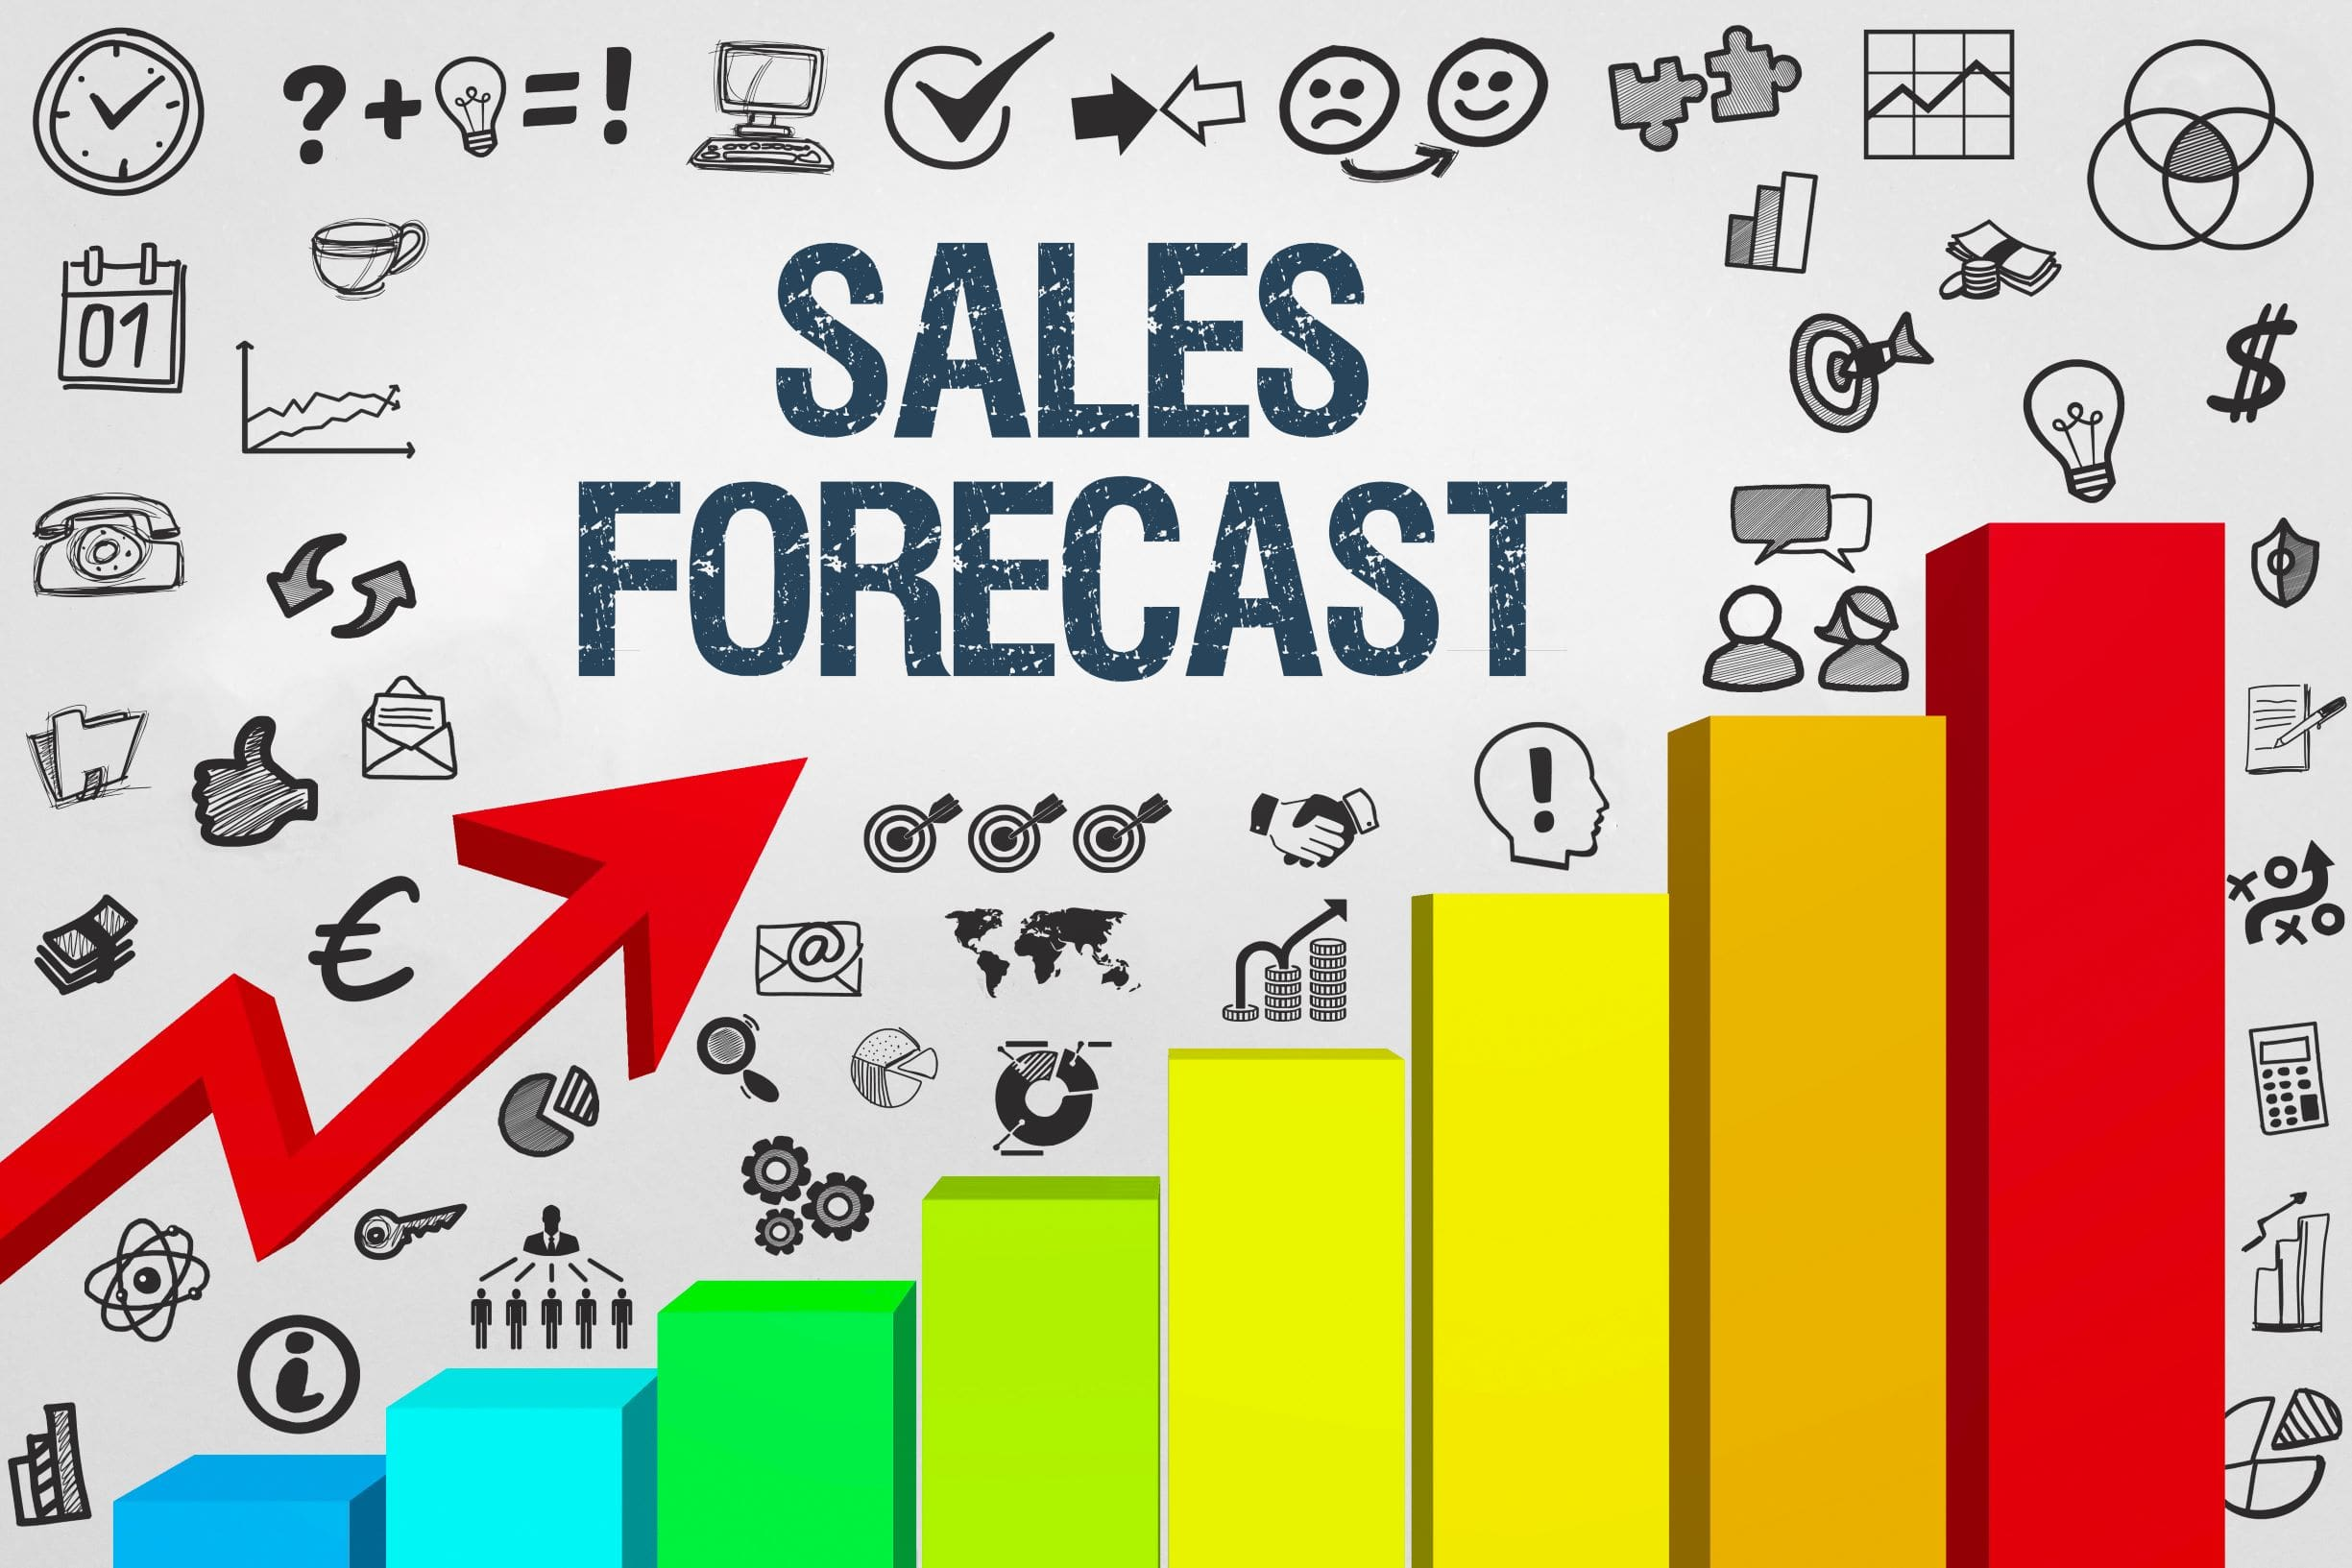

In [5]:
from IPython import display
display.Image("C:\\Users\\Malvika\\Downloads\\sales.jpeg")

In [6]:
# head() will display the first 5 rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# tail() will display the last 5 rows of the dataset
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
# To check the shape of our dataset

df.shape  # it has 200 rows and 5 columns

(200, 5)

In [9]:
# To check the size of our dataset

df.size  # the total size

1000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.describe()  # describe() provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column in the DataFrame.

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### We can interpret our data as per above statistical measures as follows:-

- The range of TV is from 0.700000 to 296.400000
- The range of Radio is from 0.000000 to 49.600000
- The range of Newspaper is from 0.300000 to 114.000000
- The range of Sales is from 1.600000 to 27.000000

In [12]:
df.isnull()  # this will check the null values in the dataset as here our data showing "False" that means it has no null values 

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
df.isnull().sum()   # We can see that all values are 0. It means that there are no null values over the entire data frame

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [14]:
# To check for duplicate values

duplicate_count = df.duplicated().sum()
print(duplicate_count) 

0


In [15]:
# To view the column names in the dataset we will use 

df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
type(df) 

pandas.core.frame.DataFrame

In [17]:
# Now if we see our dataset again we can analyize that we have two columns with same range so we can drop one of that column

df.drop(["Unnamed: 0"], axis=1, inplace=True)  #Inplace=True will make the changes in original dataset

In [18]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
# Count of TV column of the dataset

df["TV"].unique()
data=df["TV"].value_counts()
data

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

Now as we can see our data has already in Numerical form so we can simply analyze it using graphs

In [243]:
plt.figure(figsize=(12,8))
px.scatter(df,x='TV',y='Sales',width=800,height=500,title='Sales Vs TV')

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

In [244]:
px.scatter(df,x='Radio',y='Sales',width=800,height=500,title='Sales Vs Radio')

<IPython.core.display.Javascript object>

In [245]:
px.scatter(df,x='Newspaper',y='Sales',width=800,height=500,title='Sales Vs Newspaper')

<IPython.core.display.Javascript object>

In [32]:
def distPlot(x:str="", y:str="", data:pd.DataFrame()=None):
    plt.title("{1} {0}".format(x, y))
    sns.scatterplot(x=data[x], y=data[y], hue=data[x])
    plt.show()

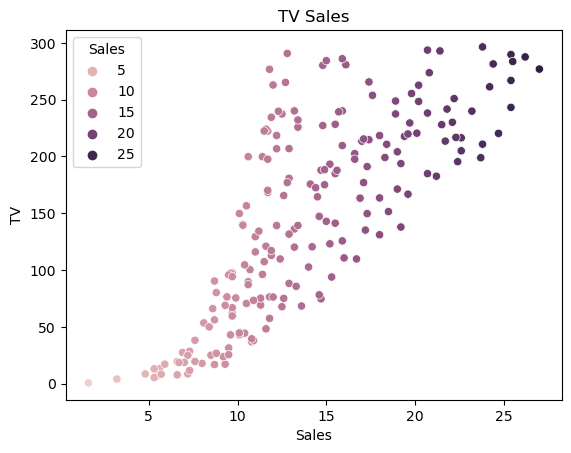

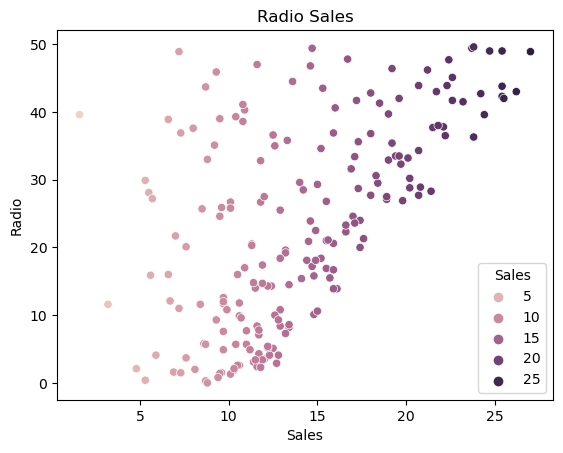

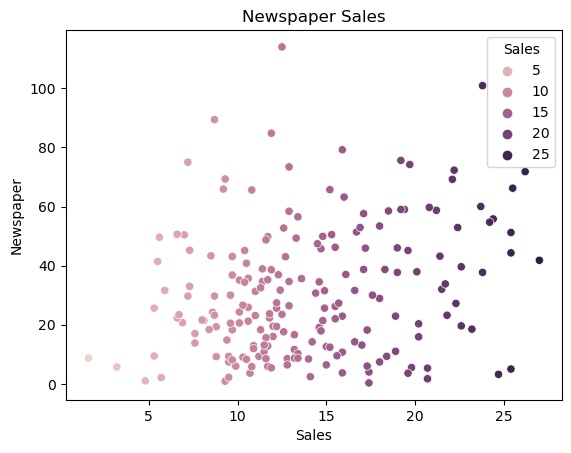

In [34]:
distPlot(x='Sales', y='TV', data=df)
distPlot(x='Sales', y='Radio', data=df)
distPlot(x="Sales", y='Newspaper', data=df)

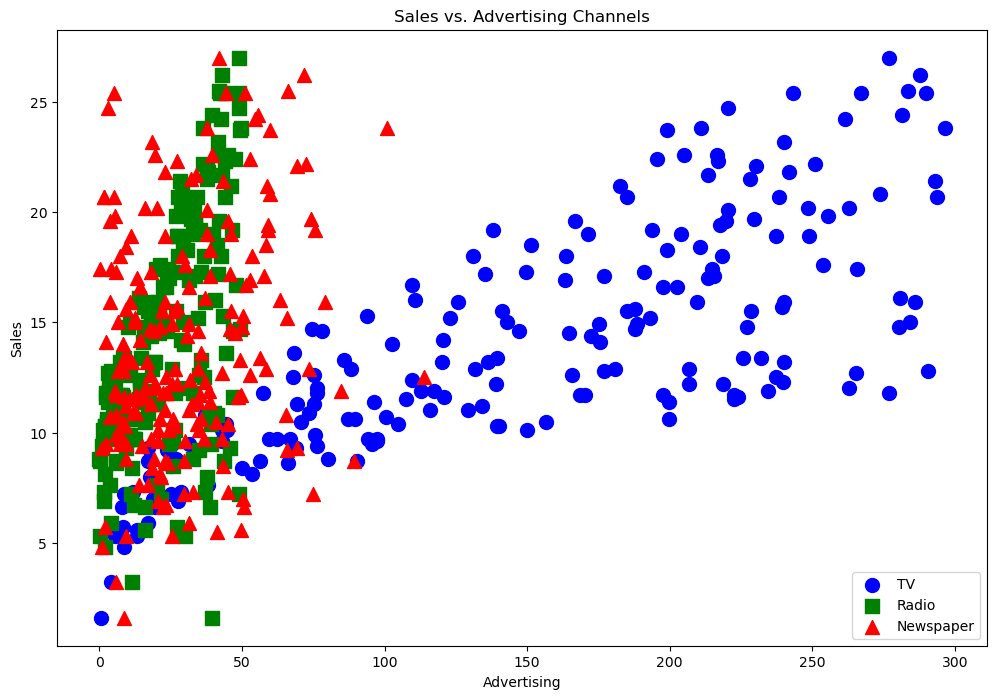

In [246]:
plt.figure(figsize=(12, 8))
plt.scatter(df['TV'], df['Sales'], label='TV', marker='o', color='blue', s=100)
plt.scatter(df['Radio'], df['Sales'], label='Radio', marker='s', color='green', s=100)
plt.scatter(df['Newspaper'], df['Sales'], label='Newspaper', marker='^', color='red', s=100)

# Set axis labels and title
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Sales vs. Advertising Channels')

# Add legend
plt.legend()

plt.show()

We can see TV channel is high in demand

In [35]:
## Correlation

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

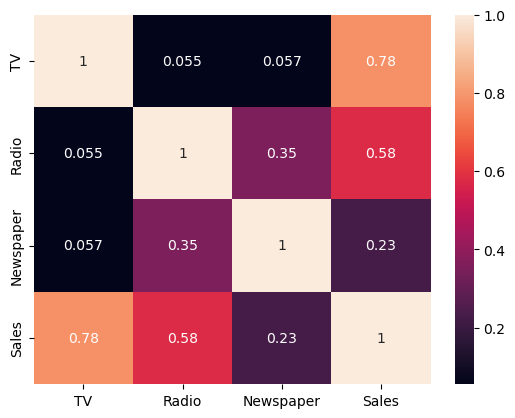

In [38]:
sns.heatmap(df.corr(), annot=True)

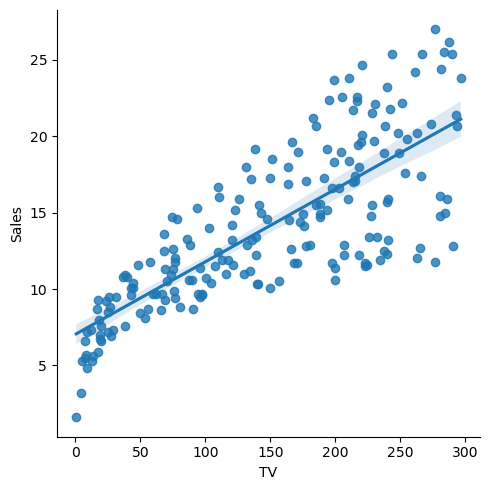

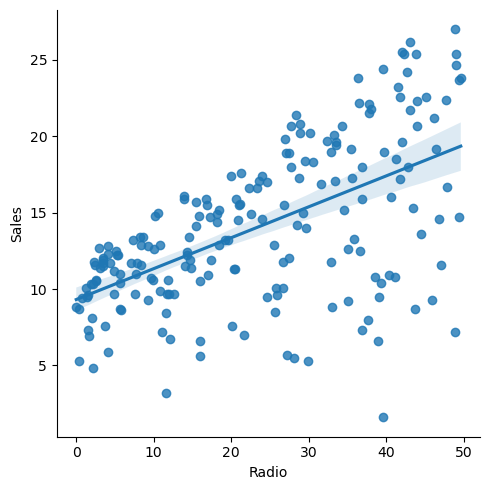

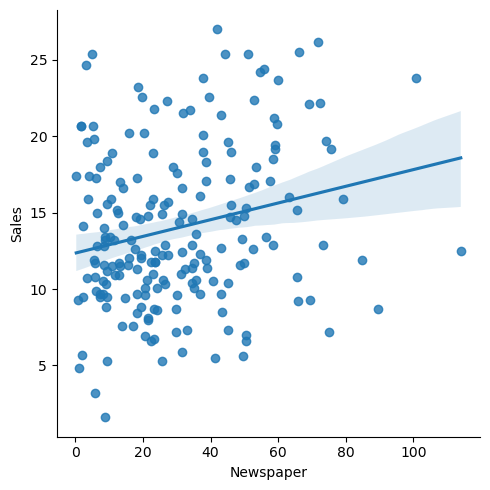

In [43]:
sns.lmplot(data=df,x='TV',y="Sales")
sns.lmplot(data=df,x='Radio',y="Sales")
sns.lmplot(data=df,x='Newspaper',y="Sales")

In [51]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


As we want to predict the sales so sales is our dependent variable and TV, Radio and Newspaper are our independent variables

## Creating a model using Linear Regression 

In [170]:
# Model Prediction - So here we are going to predict sales using Linear regression
# Some libraries we need 

from sklearn.model_selection import train_test_split

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score, precision_score

In [174]:
X = df.drop("Sales", axis=1)

In [175]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [176]:
Y = df["Sales"]

In [177]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [180]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [181]:
Y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [87]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [182]:
Y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [185]:
scaler

StandardScaler()

In [186]:
X_train = scaler.fit_transform(X_train)

In [187]:
X_train

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [188]:
X_test = scaler.fit_transform(X_test)

In [189]:
X_test

array([[ 0.31169191,  0.45489058,  0.74818001],
       [ 0.66693106,  1.5346898 ,  0.74818001],
       [ 1.74592846,  0.23356527,  0.38371819],
       [-1.36601071,  0.81035243,  0.45886496],
       [ 0.94249039,  1.62187856, -1.11921718],
       [-0.66438573,  0.68292271,  0.74066534],
       [ 0.90375715,  1.27983036, -0.21745596],
       [-0.94215839, -0.88647493, -0.54810174],
       [ 0.96573034, -1.43643478, -0.74724068],
       [ 0.44227827, -0.15543073, -0.05589041],
       [-1.14689123, -0.01458735, -1.15679057],
       [-0.87354523, -1.28217775, -0.1235225 ],
       [ 1.09963668, -1.43643478,  1.94677097],
       [-1.43573054,  0.34087451, -0.8862622 ],
       [ 0.04830588, -1.52362354, -0.23999999],
       [ 0.38805173, -1.14133437,  0.08313111],
       [-1.41470392,  0.22015161,  0.3160861 ],
       [ 0.69127767, -0.10177611, -0.70590996],
       [-0.6621724 , -0.30298093, -0.01831702],
       [ 1.13172994,  0.17991065, -0.82614479],
       [ 1.04430348,  0.50183837,  1.548

In [190]:
model = LinearRegression()

In [191]:
model

LinearRegression()

In [192]:
model.fit(X_train, Y_train)

LinearRegression()

In [193]:
y_pred = model.predict(X_test)

In [194]:
y_pred

array([16.58534325, 20.93766365, 21.34568189, 11.24650542, 22.11385227,
       13.54751052, 21.06342583,  8.04754087, 13.68240487, 15.32768341,
        9.6773921 ,  7.22465671, 14.3372533 ,  9.59784578, 10.01397456,
       12.37840059,  9.40720081, 16.37840097, 10.7604122 , 18.81617532,
       19.51892748, 13.67198022, 12.90878406, 21.1929471 ,  8.37148519,
        6.40180812, 20.7712911 , 12.29336321,  9.65041037,  9.20182049,
       12.60817226, 10.51389422, 21.41676363, 12.82955411, 18.12766392,
       20.11098404, 14.58544413, 20.69293515, 11.40010316,  5.24234371])

In [205]:
# Training accuracy

training_accuracy = model.score(X_train, Y_train)

In [206]:
training_accuracy

0.8957008271017817

In [208]:
# Testing accuracy

testing_accuracy = model.score(X_test, Y_test)

In [209]:
testing_accuracy

0.8863195562008254

In [195]:
mae = mean_absolute_error(Y_test, y_pred)

In [196]:
mae

1.4542808000700944

In [197]:
mse = mean_squared_error(Y_test, y_pred)

In [198]:
mse

3.588163345396854

In [200]:
r2 = r2_score(Y_test, y_pred)

In [222]:
print("R2 score :-", r2)

R2 score :- 0.8863195562008254


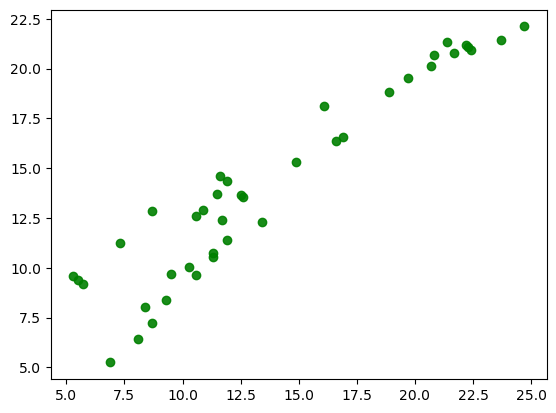

In [237]:
plt.scatter(x=Y_test,y=y_pred, color="g", alpha=0.9)

## Final Conculsion

Training Accuracy: 0.895 (89.5%)
This indicates that the model fit the training data quite well.

Testing Accuracy: 0.8863 (88.6%)
This suggests that model will make accurate prediction on new sample. 

R2 score :- 0.8863195562008254

Overall, based on the provided scores, we can conclude that the model appears to be performing well, demonstrating good generalization to data. 